In [3]:
!pip3 install pandana pandas pyrosm matplotlib numpy

In [4]:
import pandas as pd
import os
from pyrosm import OSM, get_data
import numpy as np
import matplotlib.pyplot as plt
import pandana

In [5]:
# Load time table of selected bus line (see notebook parse_static_gtfs)
df = pd.read_parquet('data/timetable/C01808.parquet')
df

,trip_id,stop_id,arrival_time,departure_time,stop_sequence,local_zone_id,stop_name,stop_lon,stop_lat,zone_id,...,bikes_allowed,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date
route_short_id,,,,,,,,,,,,,,,,,,,,,
C01808,IDFM:RATP:150618-C01808-COU_RATP_5093317_12173...,IDFM:2167,05:10:00,05:10:00,0,None,Les Mobiles,2.329813,48.949320,3,...,0,True,True,True,True,True,False,False,20240719,20240816
C01808,IDFM:RATP:150618-C01808-COU_RATP_5093317_12173...,IDFM:25627,05:12:00,05:12:00,1,None,Avenue de la Marne - Commandant Louis Bouchet,2.326956,48.952784,3,...,0,True,True,True,True,True,False,False,20240719,20240816
C01808,IDFM:RATP:150618-C01808-COU_RATP_5093317_12173...,IDFM:25628,05:13:00,05:13:00,2,None,Lycée,2.322119,48.953044,3,...,0,True,True,True,True,True,False,False,20240719,20240816
C01808,IDFM:RATP:150618-C01808-COU_RATP_5093317_12173...,IDFM:7986,05:14:00,05:14:00,3,None,Les Béatus,2.319442,48.952004,3,...,0,True,True,True,True,True,False,False,20240719,20240816
C01808,IDFM:RATP:150618-C01808-COU_RATP_5093317_12173...,IDFM:2168,05:15:00,05:15:00,4,None,Rose Bertin,2.316304,48.952868,3,...,0,True,True,True,True,True,False,False,20240719,20240816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C01808,IDFM:RATP:150618-C01808-COU_RATP_5093316_31041...,IDFM:28539,23:08:00,23:08:00,13,None,Rue de Saint-Gratien,2.297754,48.963507,4,...,0,False,False,False,False,False,True,True,20240803,20240817
C01808,IDFM:RATP:150618-C01808-COU_RATP_5093316_31041...,IDFM:2309,23:09:00,23:09:00,14,None,Limites des Départements,2.300403,48.965572,4,...,0,False,False,False,False,False,True,True,20240803,20240817
C01808,IDFM:RATP:150618-C01808-COU_RATP_5093316_31041...,IDFM:7604,23:13:00,23:13:00,15,None,Casino,2.305867,48.968563,4,...,0,False,False,False,False,False,True,True,20240803,20240817


In [6]:
# Download data for Ile de France region from OpenStreetMap
idf_osm = OSM(get_data("Ile de France"))

In [7]:
# Parse street networks from OSM data
nodes, edges = idf_osm.get_network(nodes=True, network_type="driving")

In [8]:
# Export OSM network to routable graph
G = idf_osm.to_graph(nodes, edges, graph_type="pandana")

Generating contraction hierarchies with 1 threads.
Setting CH node vector of size 2171502
Setting CH edge vector of size 3873636
Range graph removed 3099908 edges of 7747272
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


In [9]:
# Get nearest graph node of all stops for selected bus line
node_ids = G.get_node_ids(df.stop_lon.values, df.stop_lat.values)
node_ids

0         6401709630
1         9602049251
2         9602049253
3         9602049257
4         6800601324
            ...     
18485     6366151989
18486     7191554518
18487      180354491
18488     6366151991
18489    11408736425
Name: node_id, Length: 18490, dtype: int64

In [10]:
# Compute shortest path between consecutive stops
orig = node_ids.iloc[:-1]
dest = node_ids.iloc[1:]
shortest = G.shortest_paths(orig, dest)

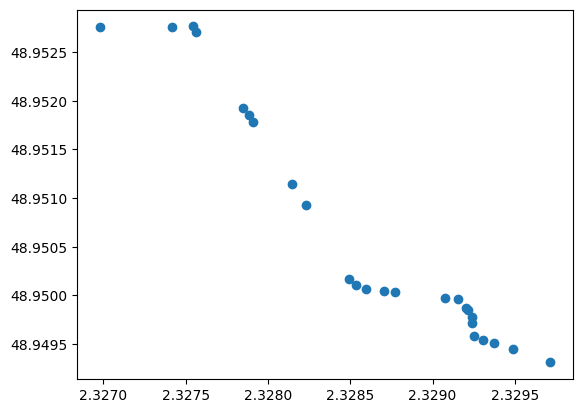

In [11]:
# Plot route
path_pos = G.nodes_df[G.nodes_df.index.isin(shortest[0])]

plt.scatter(path_pos.x, path_pos.y)
plt.show()